<a href="https://colab.research.google.com/github/hvtola/master_thesis/blob/main/Thesis_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import seaborn as sns

In [4]:
# --- Import data
# --- aspect ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'] = [1, 2, 3, 4, 5, 6, 7, 8]
# --- path_type ['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7', 'Type 8'] = [1, 2, 3, 4, 5, 6, 7, 8]
url = 'https://raw.githubusercontent.com/hvtola/master_thesis/main/main_data.csv'
df = pd.read_csv(url)
df = df.drop(['reference', 'Unnamed: 0', 'a_linear', 'L_linear', 'L_flow'], axis='columns')

In [ ]:
df.describe()

,aspect,size_d,P,alt_min,alt_max,a_flow,beta_5,beta_6,beta_7,beta_8,...,R_min,T_min,D_min,R_max,T_max,D_max,H,P/L_flow,y^,Hy^
count,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,...,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000
mean,4.267399,2.868531,1209.484445,2017.702234,2320.494788,32.311543,16.388030,17.406858,18.444649,19.546763,...,21.157751,28.362458,18.507710,43.073914,46.957448,37.899911,302.792553,2.408979,0.002168,0.376676
std,1.507238,0.697045,1263.744941,507.427914,475.897937,6.081921,17.797330,17.914944,17.994257,18.008900,...,12.765554,25.515589,11.519164,34.899220,39.363661,32.017833,248.734177,0.448604,0.003149,0.401304
min,1.000000,1.000000,48.762708,453.053406,823.632141,15.010402,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046679,0.000000,0.000000,8.826660,1.824742,-0.031150,-2.611114
25%,3.000000,2.000000,486.263557,1636.640137,1972.116455,28.083139,0.000000,0.000000,0.000000,0.000000,...,10.492116,10.439872,9.413264,19.148071,19.340212,16.008824,133.050049,2.127246,0.000530,0.162123
50%,4.000000,3.000000,827.067573,1970.462646,2266.291016,32.322775,0.000000,20.268547,25.227049,27.230273,...,20.214273,21.537894,17.673315,33.953832,36.255715,29.402018,224.393799,2.267441,0.001359,0.304301
75%,5.000000,3.000000,1450.525855,2373.549316,2635.748535,36.254209,33.681734,34.270753,34.841433,35.359710,...,31.000296,38.925013,27.080988,56.927747,62.102702,49.819432,388.747559,2.533295,0.002835,0.508419
max,8.000000,5.000000,19422.804774,3891.017822,4456.787109,49.985638,65.910383,65.122947,65.536894,65.536894,...,56.316959,249.528203,59.632260,257.608369,258.276780,258.093868,2673.866211,9.306672,0.068256,4.204657


In [5]:
# --- All data
dataframe = df

target_name = 'a_flow'
y_df = dataframe[target_name]
y = y_df.values

drop_list = ['a_flow']
X_df = dataframe.drop(drop_list, axis='columns')
X = X_df.values
feature_names = X_df.columns.values

In [6]:
X.shape, y.shape

((18377, 33), (18377,))

RMSE: -2.22 (+/- 0.23)
R2: 0.86 (+/- 0.01)


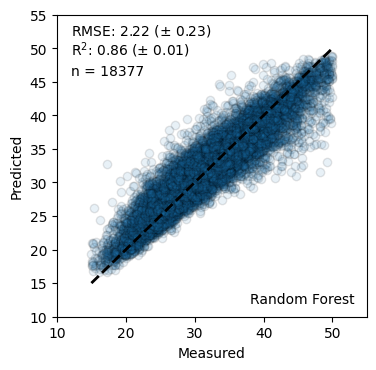

In [7]:
# --- Random Forest on all data (takes some time)
rmse = np.empty([0])
r2 = np.empty([0])

for i in range(42, 43, 1):
    rf = RandomForestRegressor(random_state = i, criterion='mse') #, max_features=2)
    rf.fit(X, y)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse = np.append(rmse, scores)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
    r2 = np.append(r2, scores)
    
predictions = cross_val_predict(rf, X, y, cv=5, n_jobs=-1)
    
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.scatter(y, predictions, edgecolors=(0, 0, 0), alpha=0.1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.text(12, 52, r"RMSE: %0.2f ($\pm$ %0.2f)" % (rmse.mean()*-1, rmse.std() * 2))
plt.text(12, 49, r"R$^{2}$: %0.2f ($\pm$ %0.2f)" % (r2.mean(), r2.std() * 2))
plt.text(12, 46, r"n = %0.0f" % len(dataframe))
plt.text(38, 12, 'Random Forest')
plt.xlim(10, 55)
plt.ylim(10, 55)
plt.show()

Text(0.5, 1.0, 'How much does each feature contribute?')

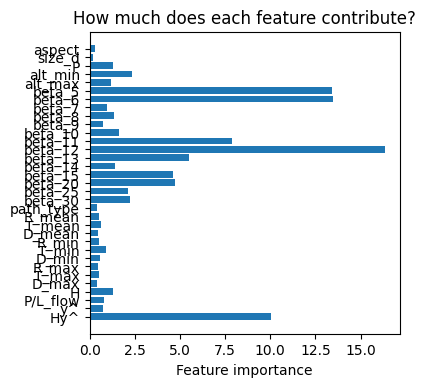

In [8]:
# --- Feature importance
fig, ax = plt.subplots(figsize=(4,4), dpi=100)

y_pos = np.arange(len(feature_names))

ax.barh(y_pos, rf.feature_importances_*100, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance')
ax.set_title('How much does each feature contribute?')

In [ ]:
df = pd.read_csv(url)
df = df.drop(['reference', 'Unnamed: 0', 'a_linear', 'L_linear', 'L_flow'], axis='columns')

# --- Split groups by beta_5, beta_10, beta_15
g1 = df.loc[(df['beta_5'] > 0)]
df = df[~df.index.isin(g1.index)]

g2 = df.loc[(df['beta_5'] == 0) & (df['beta_10'] > 0)]
df = df[~df.index.isin(g2.index)]
g2 = g2.drop(['beta_5'], axis='columns')

g3 = df.loc[(df['beta_10'] == 0) & (df['beta_15'] > 0)]
df = df[~df.index.isin(g3.index)]
g3 = g3.drop(['beta_5', 'beta_6', 'beta_7', 'beta_8', 'beta_9'], axis='columns')

t3 = df.loc[(df['beta_15'] == 0) & (df['beta_30'] > 0)]
t3x = df.loc[(df['beta_30'] == 0)]
g4 = t3.append(t3x)
g4 = g4.drop(['beta_5', 'beta_6', 'beta_7', 'beta_8', 'beta_9', 'beta_10', 'beta_11', 'beta_12', 'beta_13', 'beta_14'], axis='columns')

In [ ]:
g1.shape, g2.shape, g3.shape, g4.shape

((8741, 34), (2549, 33), (2508, 29), (4579, 24))

In [ ]:
# --- Change between group 1, 2, 3 and 4
dataframe = g4

target_name = 'a_flow'
y_df = dataframe[target_name]
y = y_df.values

drop_list = ['a_flow']
X_df = dataframe.drop(drop_list, axis='columns')
X = X_df.values
feature_names = X_df.columns.values

In [ ]:
X.shape, y.shape

((4579, 23), (4579,))

RMSE: -3.04 (+/- 0.33)
R2: 0.63 (+/- 0.05)


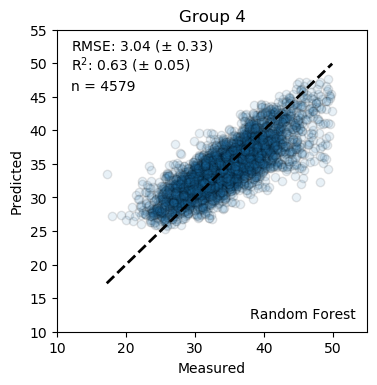

In [ ]:
# --- Random Forest for group 1, 2, 3 or 4 (select group above)
rmse = np.empty([0])
r2 = np.empty([0])

for i in range(42, 43, 1):
    rf = RandomForestRegressor(random_state = i, criterion='mse') #, max_features=2)
    rf.fit(X, y)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse = np.append(rmse, scores)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
    r2 = np.append(r2, scores)
    
predictions = cross_val_predict(rf, X, y, cv=5, n_jobs=-1)
    
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.scatter(y, predictions, edgecolors=(0, 0, 0), alpha=0.1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.text(12, 52, r"RMSE: %0.2f ($\pm$ %0.2f)" % (rmse.mean()*-1, rmse.std() * 2))
plt.text(12, 49, r"R$^{2}$: %0.2f ($\pm$ %0.2f)" % (r2.mean(), r2.std() * 2))
plt.text(12, 46, r"n = %0.0f" % len(dataframe))
plt.text(38, 12, 'Random Forest')
plt.xlim(10, 55)
plt.ylim(10, 55)
plt.title('Group 4')
plt.show()

In [ ]:
# --- Create the RFECV object and compute a cross-validated score.
rf = RandomForestRegressor(random_state = 42, criterion='mse')
rfecv = RFECV(estimator=rf, step=1, cv=5, n_jobs=-1, scoring='r2')
rfecv.fit(X, y)

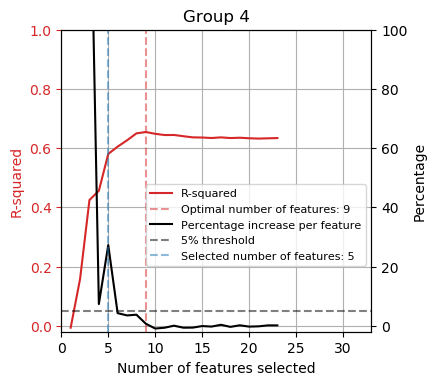

Optimal number of features : 9


In [ ]:
# --- Plot 
selected = 5
input_data = len(rfecv.grid_scores_)-1
percentage = np.array([])
for i in range(input_data):
  t = (rfecv.grid_scores_[i+1]/rfecv.grid_scores_[i+0]-1)*100
  percentage = np.append(percentage, t)

percentage = np.insert(percentage, 0, 110)
percentage[1] = 110 # Uncheck for group 4, mark out with "#" for group 1-3

# Plot number of features VS. cross-validation scores
fig, ax1 = plt.subplots(figsize=(4,4), dpi=100)
ax2 = ax1.twinx()
ax1.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, label=r'R-squared', color='tab:red', alpha=1)
ax2.plot(range(0+1, input_data+2, 1), percentage, color='k', label='Percentage increase per feature', alpha=1)
ax1.axvline(x=rfecv.n_features_, color='tab:red', linestyle='--', label='Optimal number of features: %d' % rfecv.n_features_, alpha=0.5)
ax2.axhline(y=5, color='k', linestyle='--', label='5% threshold', alpha=0.5)
ax2.axvline(x=selected, color='tab:blue', linestyle='--', label='Selected number of features: %d' % selected, alpha=0.5)
ax2.set_xlim([0, 33])
ax2.set_ylim([-2, 100])
ax1.set_ylim([-0.02, 1])
plt.title('Group 4')
ax1.grid()
ax1.set_xlabel('Number of features selected')
ax2.set_ylabel('Percentage', color='k')
ax1.set_ylabel(r'R-squared', color='tab:red')
ax1.tick_params(axis='y', colors='tab:red')
fig.legend(fontsize=8, loc='center left', bbox_to_anchor=(0.35, 0.4))
plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)

Text(0.5, 0, 'Feature importance (%)')

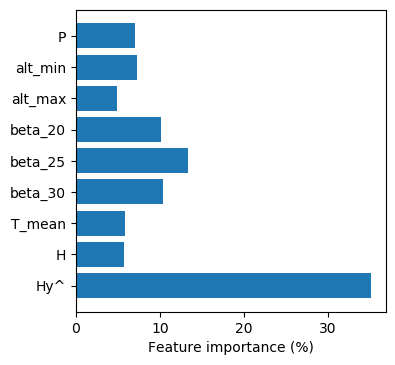

In [ ]:
# --- Plot feature importance from valid RFECV parameters
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
value = feature_names[rfecv.support_]
y_pos = np.arange(len(value))
ax.barh(y_pos, rfecv.estimator_.feature_importances_*100 , align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(keep)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance (%)')

In [ ]:
# --- Extract selected parameters after RFECV
g1 = g1[['a_flow', 'beta_5', 'beta_15']]
g2= g2[['a_flow', 'beta_10', 'beta_15']]
g3= g3[['a_flow', 'beta_15', 'Hy^', 'beta_20']]
g4= g4[['a_flow', 'Hy^', 'beta_30', 'beta_25', 'beta_20', 'alt_min']]

In [ ]:
g1.shape, g2.shape, g3.shape, g4.shape

((8741, 3), (2549, 3), (2508, 4), (4579, 6))

In [ ]:
# --- Change between group 1, 2, 3 and 4
dataframe = g1

target_name = 'a_flow'
y_df = dataframe[target_name]
y = y_df.values

drop_list = ['a_flow']
X_df = dataframe.drop(drop_list, axis='columns')
X = X_df.values
feature_names = X_df.columns.values

In [ ]:
X.shape, y.shape

((8741, 2), (8741,))

RMSE: -1.83 (+/- 0.30)
R2: 0.92 (+/- 0.03)


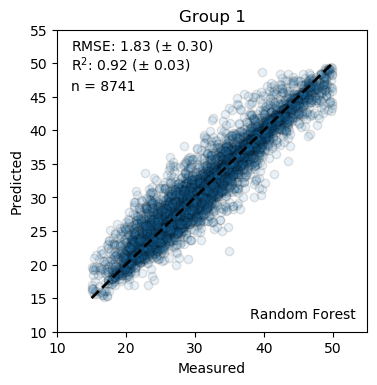

In [ ]:
# --- Random Forest for the selected data
rmse = np.empty([0])
r2 = np.empty([0])

for i in range(42, 43, 1):
    rf = RandomForestRegressor(random_state = i, criterion='mse') #, max_features=2)
    rf.fit(X, y)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse = np.append(rmse, scores)
    
    scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
    r2 = np.append(r2, scores)
    
predictions = cross_val_predict(rf, X, y, cv=5, n_jobs=-1)
    
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print("R2: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.scatter(y, predictions, edgecolors=(0, 0, 0), alpha=0.1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.text(12, 52, r"RMSE: %0.2f ($\pm$ %0.2f)" % (rmse.mean()*-1, rmse.std() * 2))
plt.text(12, 49, r"R$^{2}$: %0.2f ($\pm$ %0.2f)" % (r2.mean(), r2.std() * 2))
plt.text(12, 46, r"n = %0.0f" % len(dataframe))
plt.text(38, 12, 'Random Forest')
plt.xlim(10, 55)
plt.ylim(10, 55)
plt.title('Group 1')
plt.show()